# Handwritten character recognition

## Importing necessary packages

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

## Loading in the data

Data can be downloaded from Kaggle [here](https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format). 

In [3]:
data = pd.read_csv("./data/A_Z Handwritten Data/A_Z_Handwritten_Data.csv").astype('float32')

data.head(10)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Setting up the splits for training and testing

In [3]:
# Split data into images and labels
X = data.drop('0', axis= 1)
y = data['0']
# Column 0 in the data contains the labels for the images, so we assign the 0 column to y
# and drop the 0 column in X. 

In [4]:
# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# reshaping the data so that it can now be displayed as a 28x28 image.
x_train = np.reshape(x_train.values, (x_train.shape[0], 28, 28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28, 28))

print("Train data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Train data shape: (297960, 28, 28)
Test data shape: (74490, 28, 28)


## Creating a dictionary for the alphabet

In [5]:
letter_dict = {0:'A',
 1:'B',
 2:'C',
 3:'D',
 4:'E',
 5:'F',
 6:'G',
 7:'H',
 8:'I',
 9:'J',
 10:'K',
 11:'L',
 12:'M',
 13:'N',
 14:'O',
 15:'P',
 16:'Q',
 17:'R',
 18:'S',
 19:'T',
 20:'U',
 21:'V',
 22:'W',
 23:'X', 
 24:'Y',
 25:'Z'}

## Distribution of letters in data set

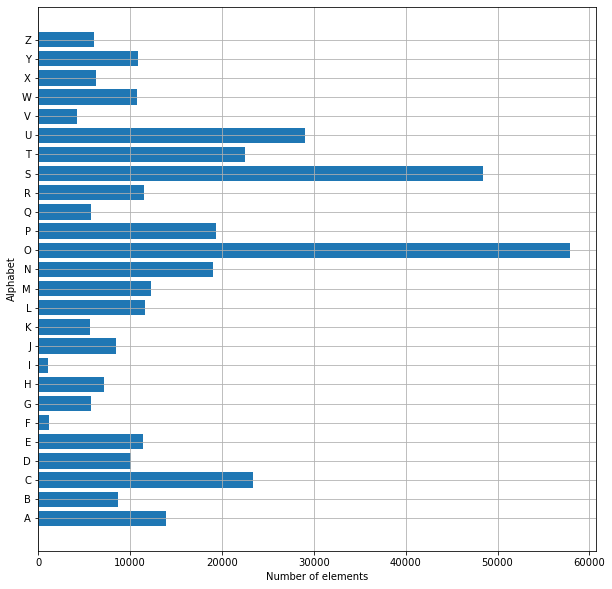

In [6]:
# Converting y values(lables) into integer values, allowing us to count each letters appearances.
y_int = np.int0(y)
# Each time integar values appear they are appended to the count list.
count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] +=1
    
# Alphabet list created use values function
alphabets = []
for i in letter_dict.values():
    alphabets.append(i)
    
# Horizontal bar plot to show letter frequency
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements")
plt.ylabel("Alphabet")
plt.grid()
plt.show()

## Plotting a few letters

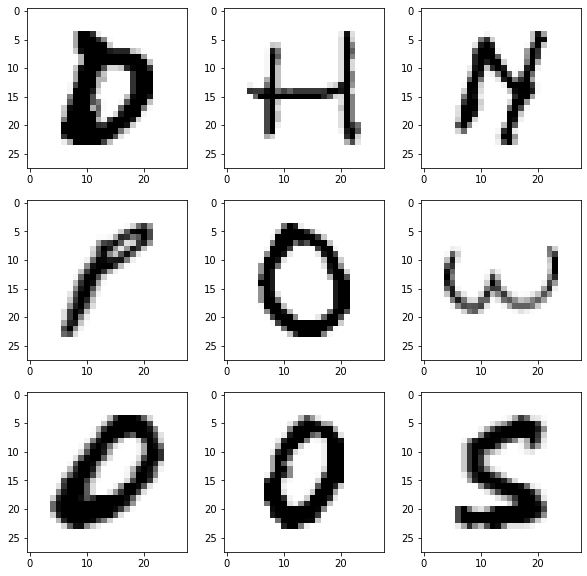

In [7]:
# Using the shuffle function to grab a random group of letters from the training set
shuff = shuffle(x_train[:100])

# Plotting 9 letters
fig, ax = plt.subplots(3,3, figsize=(10,10))
axes = ax.flatten()

for i in range(9):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

## Reshaping the data for modeling

In [8]:
X_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
print("New shape of training data: ", X_train.shape)

X_test = x_test.reshape(x_test.shape[0],x_test.shape[1], x_test.shape[2],1)
print("New shape of test data: ", X_test.shape)


New shape of training data:  (297960, 28, 28, 1)
New shape of test data:  (74490, 28, 28, 1)


## Using to_categorical funciton to convert the integars to binary class matrix

In [9]:
y_trainOHE = to_categorical(y_train, num_classes=26, dtype='int')
print("New shape of train labels: ", y_trainOHE.shape)

y_testOHE = to_categorical(y_test, num_classes=26, dtype='int')
print("New shape of test labels: ", y_testOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


# Creating the CNN
The CNN will take the input of labels and generate probabilities

In [10]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))

## Compiling and fitting the model
Defining the optimization and loss function used for fitting. I've decided to use 3 epochs to increase accuracy.

In [25]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_trainOHE, epochs=3,  validation_data = (X_test,y_testOHE))

Epoch 1/3
9312/9312 [==============================] - 86s 9ms/step - loss: 0.0758 - accuracy: 0.9788 - val_loss: 0.0720 - val_accuracy: 0.9813
Epoch 2/3
9312/9312 [==============================] - 87s 9ms/step - loss: 0.0634 - accuracy: 0.9827 - val_loss: 0.0608 - val_accuracy: 0.9836
Epoch 3/3
9312/9312 [==============================] - 86s 9ms/step - loss: 0.0566 - accuracy: 0.9846 - val_loss: 0.0683 - val_accuracy: 0.9837


## Saving the model summary

In [26]:
model.summary()
model.save(r'model_hand.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [28]:
history.history

{'loss': [0.07582677155733109, 0.06342212855815887, 0.056647397577762604],
 'accuracy': [0.978755533695221, 0.982702374458313, 0.9846086502075195],
 'val_loss': [0.07196612656116486, 0.06082184240221977, 0.06827067583799362],
 'val_accuracy': [0.9813129305839539, 0.9836085438728333, 0.9836622476577759]}

## Printing the accuracies

In [27]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9813129305839539, 0.9836085438728333, 0.9836622476577759]
The training accuracy is : [0.978755533695221, 0.982702374458313, 0.9846086502075195]
The validation loss is : [0.07196612656116486, 0.06082184240221977, 0.06827067583799362]
The training loss is : [0.07582677155733109, 0.06342212855815887, 0.056647397577762604]


## Doing predictions

In [29]:
pred = model.predict(X_test[:9])
print(X_test.shape)

(74490, 28, 28, 1)


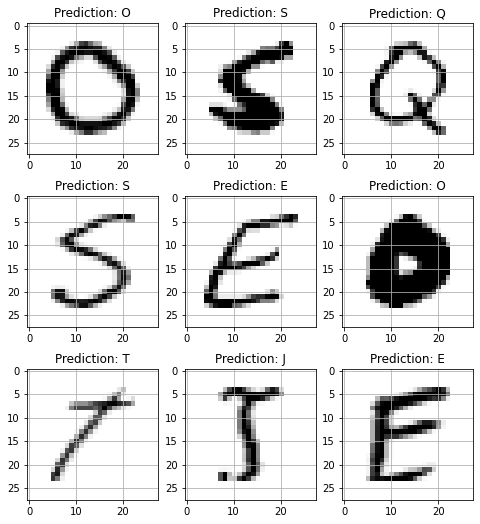

In [30]:

fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i, ax in enumerate(axes):
    img = np.reshape(X_test[i], (28,28))
    ax.imshow(img, cmap="Greys")
                     
    pred = letter_dict[np.argmax(y_testOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

### Doing a predicition on an external image

In [36]:
# Reading in the image
img = cv2.imread('./letter_b2.jpeg')
# Creating a copy to process
img_copy = img.copy()

# Converting the color from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Resizing the image
img = cv2.resize(img, (400,440))

# Blurring the image with GaussianBlur
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
# Converting the image to grayscale
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
# Applying a threshold to keep the image smooth and improve accuracy in prediction
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

# Resizing the image again to fit the model input
img_final = cv2.resize(img_thresh, (28,28))
# Reshaping for model input as well
img_final = np.reshape(img_final, (1,28,28,1))

# Make a prediction on the processed image and np.argmax
img_pred = letter_dict[np.argmax(model.predict(img_final))]

cv2.putText(img, "Dataflair _ _ _", (20,25), cv2.FONT_ITALIC, 0.7, color= (0,0,230))
cv2.putText(img, "Prediction: " + img_pred, (20,410), cv2.FONT_ITALIC, 1.3, color = (255,0,30))
cv2.imshow('Dataflair handwritten character recognition _ _ _', img)

while (1):
    k = cv2.waitKey(5000) & 0xFF
    if k == 27:
        break
    cv2.destroyAllWindows()

KeyboardInterrupt: 